In [85]:
from __future__ import print_function

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [86]:
df = pd.read_csv('data/cleaned_df.csv')

In [87]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


_Create an indicator variable for assessing popular trends in housing market._

In [88]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [89]:
df.two_and_two.mean()

0.09458023379383634

_Assess housing recession impact within housing data. This feature will be utilized as a subproject to determine the sample population of recession-based transactions._

In [90]:
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

In [91]:
df.during_recession.mean()

0.2635494155154091

_26% of the houses exchanged hands during the recession._

_Double-check accuracy in the dataframe._

In [92]:
a = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)
b = df.tx_year.between(2010, 2013).astype(int)

all(a == b)

True

In [93]:
df['during_recession'] = df.tx_year.between(2010, 2013).astype(int)

_Create heuristics for recession data._

_1._ `'property_age'`

In [94]:
df['property_age'] = df.tx_year - df.year_built

df.property_age.min()

-8

In [95]:
sum(df.property_age < 0)

19

In [96]:
df = df[df.property_age >= 0]

In [97]:
len(df)

1863

_2._ `'school_score'` -- _To determine if there's an interaction between various_ `'_schools'` _observations._

In [98]:
df['school_score'] = df.num_schools * df.median_school

In [99]:
df.school_score.median()

18.0

_Group sparse classes to simplify cosmetic attributes in categorical data._

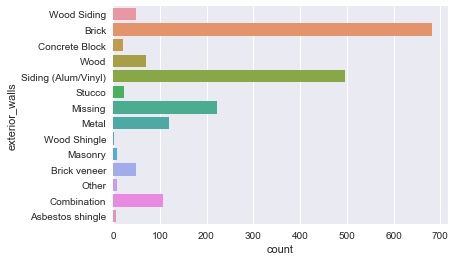

In [100]:
sns.countplot(y = 'exterior_walls', data=df)
plt.show()

In [101]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace = True)

other_exterior_walls = ['Stucco', 'Asbestos shingle', 'Concrete Block', 'Masonry', 'Other']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace = True)

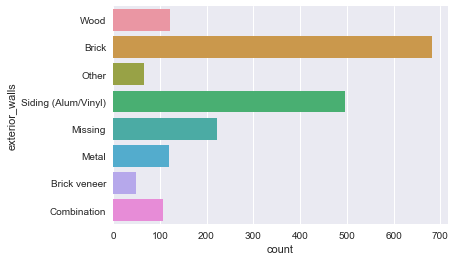

In [102]:
sns.countplot(y = 'exterior_walls', data=df)
plt.show()

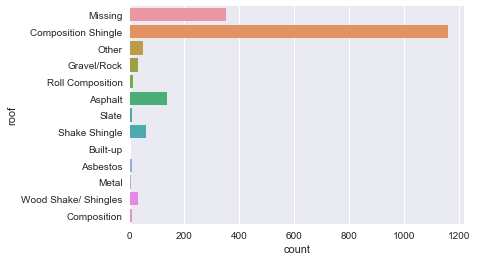

In [103]:
sns.countplot(y = 'roof', data = df)
plt.show()

In [104]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace = True)

In [105]:
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

df.roof.replace(other_roofs, 'Other', inplace = True)

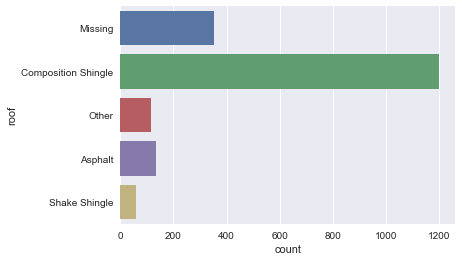

In [106]:
sns.countplot(y = 'roof', data = df)

_Prep dummy variables for machine learning algorithms._

In [107]:
df = pd.get_dummies(df, columns = ['exterior_walls', 'roof', 'property_type'])

In [108]:
df.shape

(1863, 42)

In [109]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [111]:
df = df.drop(['tx_year', 'year_built'], axis = 1)

In [113]:
df.shape

(1863, 40)

In [114]:
df.to_csv('data/analytic_base_table.csv', index = None)